In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading XYZ_Ads_Airings_Data.xlsx
df=pd.read_excel('E:/trainity/project 7/XYZ_Ads_Airings_Data.xlsx', skiprows=4)
df.head()

,Id,Brand,Product,Network,Network Type,Show,Date,Time,Pod Position,Dayparts,Duration,EQ Units,Spend ($),Broadcast Year,Broadcast Month,Broadcast Week,Day Of Week,Hour Of Day,TimeZone
0,1000001,Honda Cars,Honda Jazz,N-10079,cable,S-16736,01/10/2021,10:19:08 PM,1,PRIME TIME,30,1.0,178,2021,JAN,2,7,22,Northeast India
1,1000002,Maruti Suzuki,Maruti Suzuki Baleno,N-10096,cable,S-17450,01/16/2021,7:28:13 PM,3,WEEKEND,30,1.0,514,2021,JAN,3,6,19,Northeast India
2,1000003,Maruti Suzuki,Maruti Suzuki Ciaz,N-10044,cable,S-12299,01/05/2021,1:09:26 PM,2,DAYTIME,30,1.0,2313,2021,JAN,2,2,13,Northeast India
3,1000004,Maruti Suzuki,Maruti Suzuki Ciaz,N-10060,cable,S-14354,01/06/2021,8:55:49 AM,1,EARLY MORNING,30,1.0,308,2021,JAN,2,3,8,Northeast India
4,1000005,Hyundai Motors India,Hyundai I20,N-10123,cable,S-15146,01/02/2021,11:07:43 PM,2,LATE FRINGE,30,1.0,1885,2021,JAN,1,6,23,Northeast India


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731784 entries, 0 to 731783
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Id               731784 non-null  int64  
 1   Brand            731784 non-null  object 
 2   Product          731784 non-null  object 
 3   Network          731784 non-null  object 
 4   Network Type     731784 non-null  object 
 5   Show             731784 non-null  object 
 6   Date             731784 non-null  object 
 7   Time             731784 non-null  object 
 8   Pod Position     731784 non-null  int64  
 9   Dayparts         731784 non-null  object 
 10  Duration         731784 non-null  int64  
 11  EQ Units         731784 non-null  float64
 12  Spend ($)        731784 non-null  int64  
 13  Broadcast Year   731784 non-null  int64  
 14  Broadcast Month  731784 non-null  object 
 15  Broadcast Week   731784 non-null  int64  
 16  Day Of Week      731784 non-null  int6

In [4]:
df.Brand.value_counts()

Maruti Suzuki            280274
Mahindra and Mahindra    147890
Honda Cars                85265
Tata Motors               81041
Hyundai Motors India      71296
Toyota                    66018
Name: Brand, dtype: int64

In [5]:
df['Pod Position'].value_counts()

1     159661
2     112257
3     101340
4      84430
5      67597
6      55059
7      43161
8      33367
9      24324
10     16723
11     11136
12      7373
13      4942
14      3365
15      2243
16      1465
17      1038
18       735
19       511
20       347
21       235
22       189
23       106
24        75
25        48
26        28
27        15
28         5
29         4
31         3
30         2
Name: Pod Position, dtype: int64

In [6]:
#Q.1 What is pod position? ,
#Does the Pod position number affect the amount spent on Ads for a specific period of time by a company? 

In [7]:
pod_spend=df.groupby(['Brand','Pod Position'])['Spend ($)'].sum().reset_index()
pod_spend

,Brand,Pod Position,Spend ($)
0,Honda Cars,1,7454554
1,Honda Cars,2,7155792
2,Honda Cars,3,6667803
3,Honda Cars,4,6096237
4,Honda Cars,5,4450668
...,...,...,...
167,Toyota,23,17390
168,Toyota,24,868
169,Toyota,25,2186
170,Toyota,26,1021


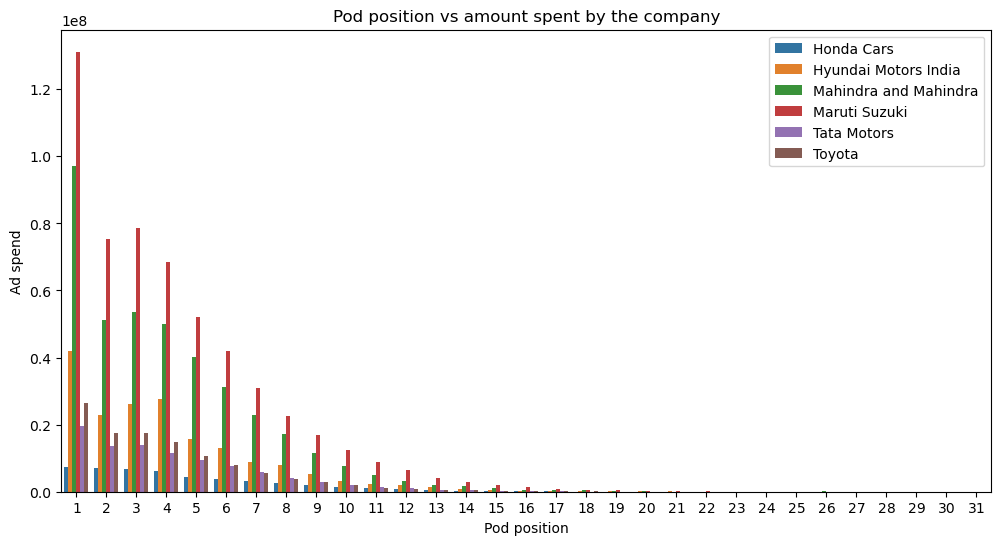

In [8]:
plt.figure(figsize=(12,6))
sns.barplot(y='Spend ($)', x='Pod Position', hue='Brand', data=pod_spend)
plt.title('Pod position vs amount spent by the company')
plt.xlabel('Pod position')
plt.ylabel('Ad spend')
plt.legend(loc='upper right')
plt.show()

In [9]:
# Q.2 What is the share of various brands in TV airings and how has it changed from Q1 to Q4 in 2021?

In [10]:
df['Date']=pd.to_datetime(df['Date'])

In [11]:
df['Quarter']=df[df['Date'].dt.year==2021]['Date'].dt.quarter
quarter_spend=df.groupby(['Brand', 'Quarter'])['Spend ($)'].sum().reset_index()
quarter_total_spend=quarter_spend.groupby('Quarter')['Spend ($)'].transform('sum')
quarter_spend['Share']=quarter_spend['Spend ($)']/quarter_total_spend
quarter_spend

,Brand,Quarter,Spend ($),Share
0,Honda Cars,1,16963778,0.037054
1,Honda Cars,2,9549604,0.029381
2,Honda Cars,3,12073060,0.038317
3,Honda Cars,4,9671898,0.032838
4,Hyundai Motors India,1,62470842,0.136454
5,Hyundai Motors India,2,40830200,0.125621
6,Hyundai Motors India,3,38727107,0.122909
7,Hyundai Motors India,4,38780607,0.131669
8,Mahindra and Mahindra,1,129215380,0.282242
9,Mahindra and Mahindra,2,99500908,0.306130


Text(0.5, 1.0, 'Share of brands in TV airings')

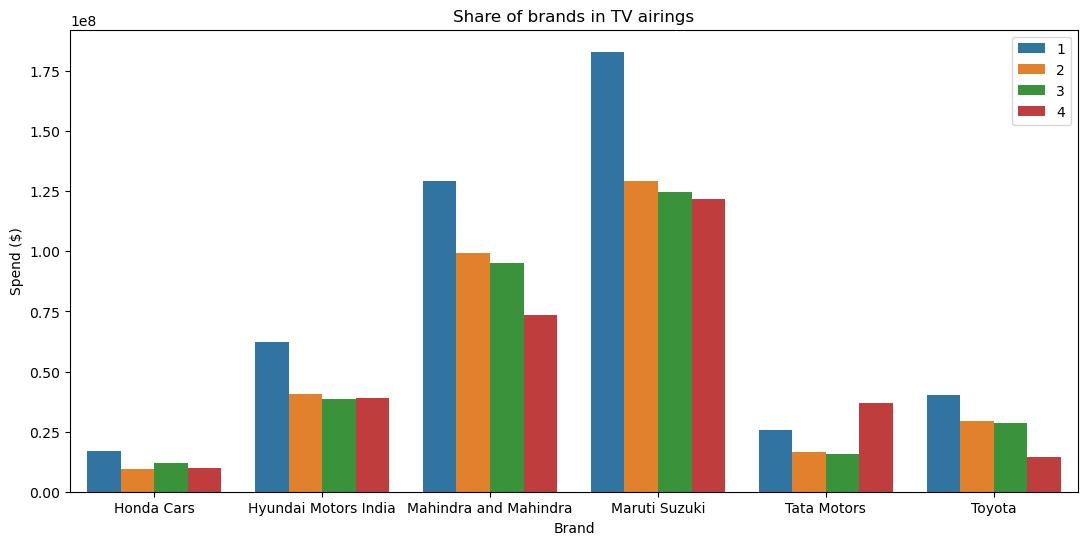

In [12]:
plt.figure(figsize=(13,6))
sns.barplot(x='Brand', y='Spend ($)', hue='Quarter', data=quarter_spend)
plt.legend(loc='upper right')
plt.title('Brands ad spend for 4 quarter')
plt.title('Share of brands in TV airings')

In [13]:
# Q.3 Conduct a competitive analysis for the brands and define advertisement strategy of different brands and how it differs
#across the brands.

In [14]:
ca_1=df.groupby(['Brand','Dayparts'])['Spend ($)'].sum().reset_index()
ca_1

,Brand,Dayparts,Spend ($)
0,Honda Cars,DAYTIME,15106799
1,Honda Cars,EARLY FRINGE,5763471
2,Honda Cars,EARLY MORNING,5190376
3,Honda Cars,EVENING NEWS,2105762
4,Honda Cars,LATE FRINGE,3421197
5,Honda Cars,OVERNIGHT,2820096
6,Honda Cars,PRIME ACCESS,1352961
7,Honda Cars,PRIME TIME,7002902
8,Honda Cars,WEEKEND,5494776
9,Hyundai Motors India,DAYTIME,12360920


Text(0.5, 1.0, 'Dayparts with respect to ad spend for brands')

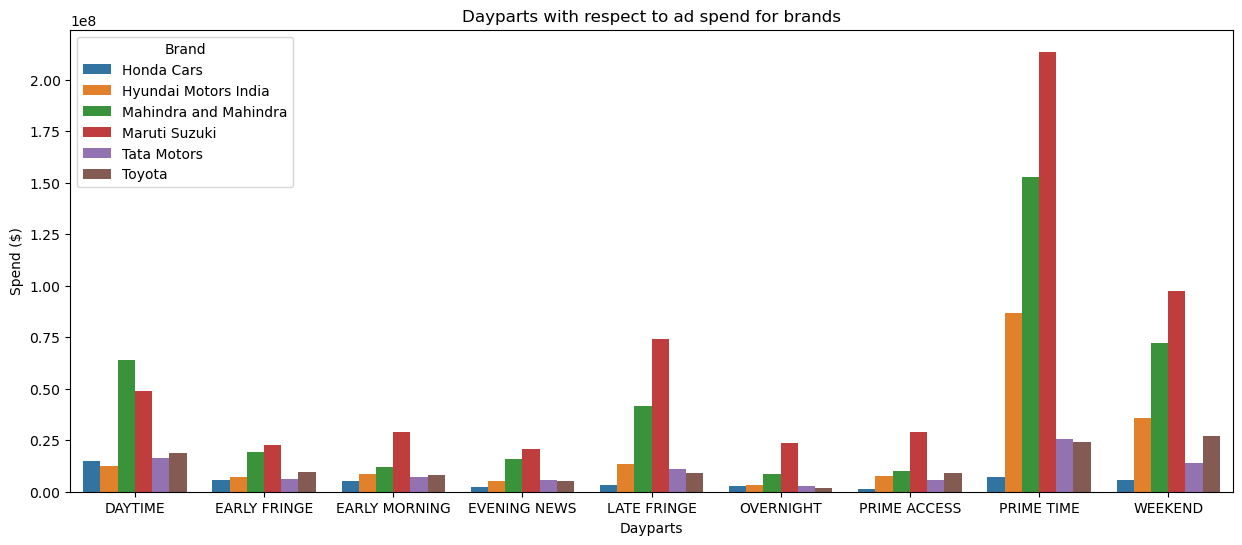

In [15]:
plt.figure(figsize=(15,6))
sns.barplot(x='Dayparts', y='Spend ($)', hue='Brand', data=ca_1)
plt.title('Dayparts with respect to ad spend for brands')

In [16]:
ca_2=df.groupby(['Brand','Dayparts','Duration'])['Spend ($)'].sum().reset_index()
ca_2

,Brand,Dayparts,Duration,Spend ($)
0,Honda Cars,DAYTIME,10,24759
1,Honda Cars,DAYTIME,15,4612277
2,Honda Cars,DAYTIME,30,10469763
3,Honda Cars,EARLY FRINGE,10,7719
4,Honda Cars,EARLY FRINGE,15,1636564
...,...,...,...,...
220,Toyota,PRIME TIME,120,8424
221,Toyota,WEEKEND,15,6027840
222,Toyota,WEEKEND,30,20649090
223,Toyota,WEEKEND,75,1180


<AxesSubplot:xlabel='Dayparts', ylabel='Spend ($)'>

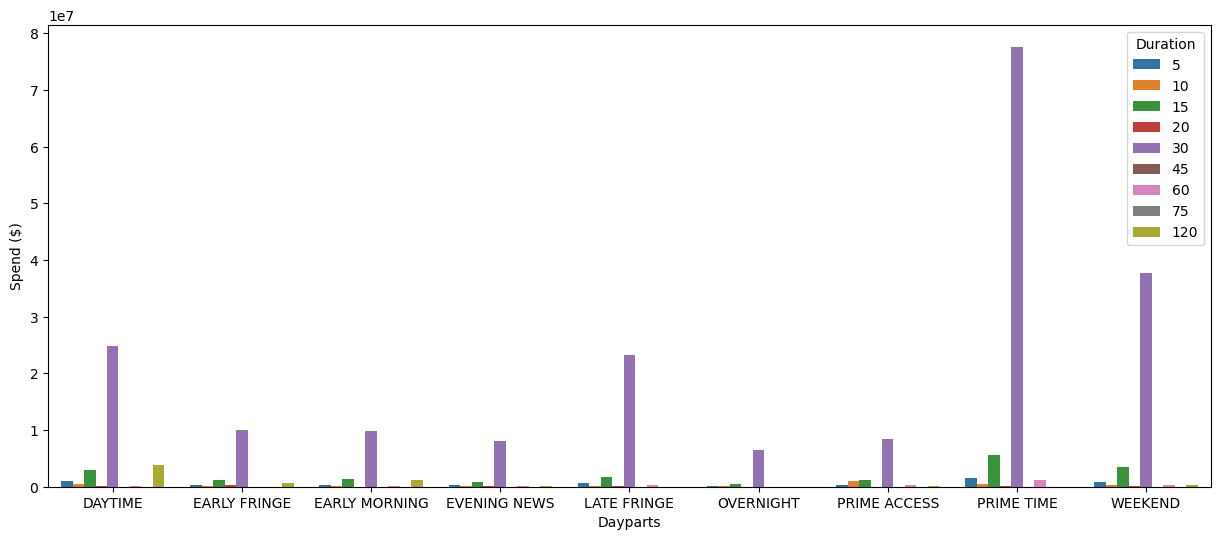

In [17]:
plt.figure(figsize=(15,6))
sns.barplot(x='Dayparts', y='Spend ($)', hue='Duration', data=ca_2, ci=None)

In [18]:
ca_3=df.groupby(['Brand','Pod Position','Duration'])['Spend ($)'].sum().reset_index()
ca_3

,Brand,Pod Position,Duration,Spend ($)
0,Honda Cars,1,10,6860
1,Honda Cars,1,15,1767014
2,Honda Cars,1,30,5680680
3,Honda Cars,2,10,12126
4,Honda Cars,2,15,2028733
...,...,...,...,...
547,Toyota,23,30,11402
548,Toyota,24,15,868
549,Toyota,25,15,2186
550,Toyota,26,30,1021


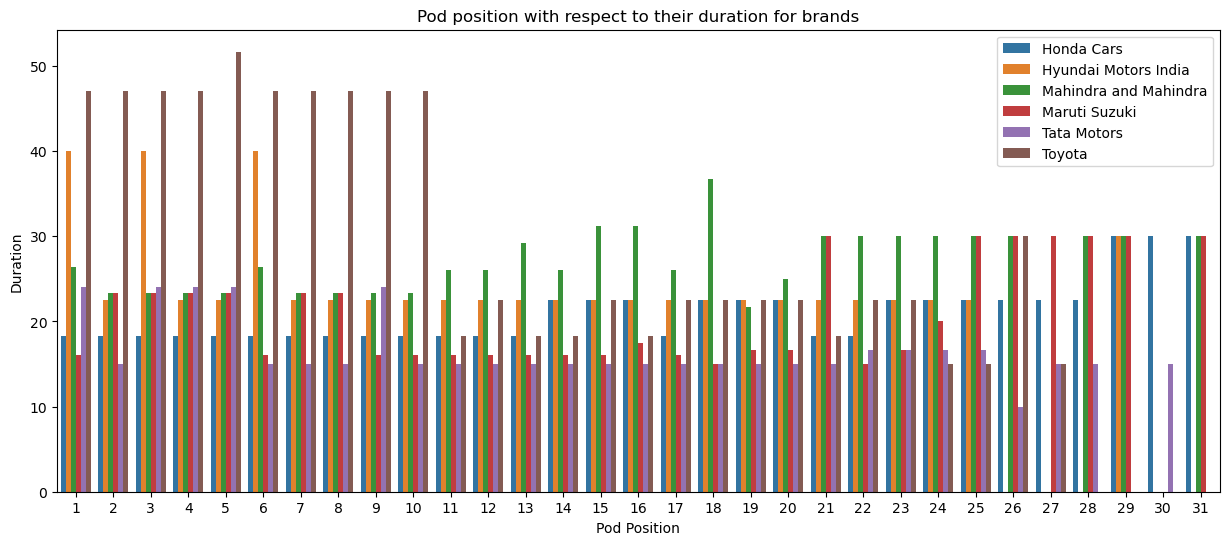

In [19]:
plt.figure(figsize=(15,6))
sns.barplot(x='Pod Position', y='Duration', hue='Brand', data=ca_3, ci=None)
plt.title('Pod position with respect to their duration for brands')
plt.legend(loc='upper right')

Text(0.5, 1.0, 'Brands with respect to their ad duration')

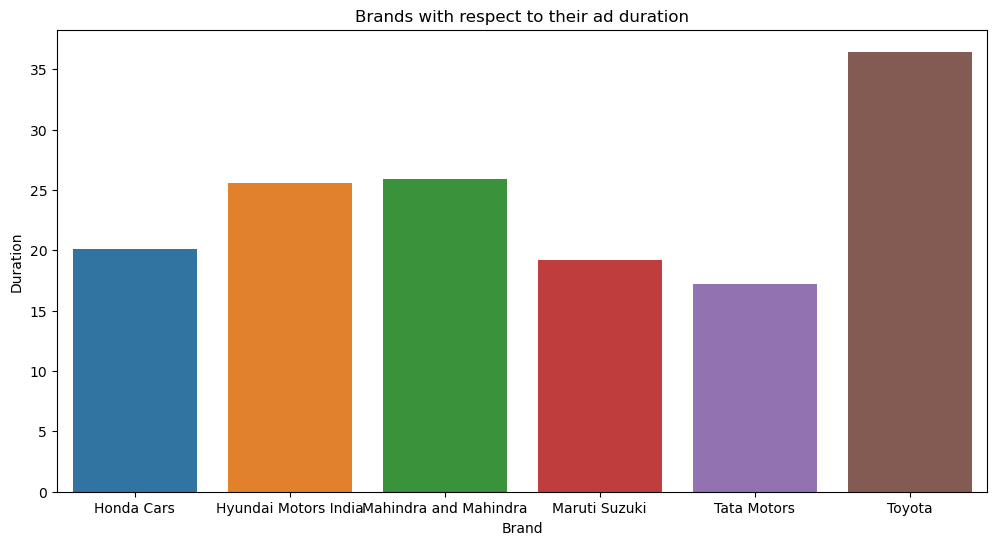

In [50]:
plt.figure(figsize=(12,6))
sns.barplot(x='Brand', y='Duration', data=ca_3, ci=None)
plt.title('Brands with respect to their ad duration')

In [21]:
ca_4=df.groupby(['Brand','Duration','EQ Units'])['Spend ($)'].sum().reset_index()
ca_4

,Brand,Duration,EQ Units,Spend ($)
0,Honda Cars,10,0.33,69197
1,Honda Cars,15,0.50,13691632
2,Honda Cars,30,1.00,34497511
3,Hyundai Motors India,15,0.50,38593358
4,Hyundai Motors India,30,1.00,142205069
5,Hyundai Motors India,75,2.50,10329
6,Mahindra and Mahindra,5,0.17,1057979
7,Mahindra and Mahindra,10,0.33,177080
8,Mahindra and Mahindra,15,0.50,1358277
9,Mahindra and Mahindra,20,0.67,1737055


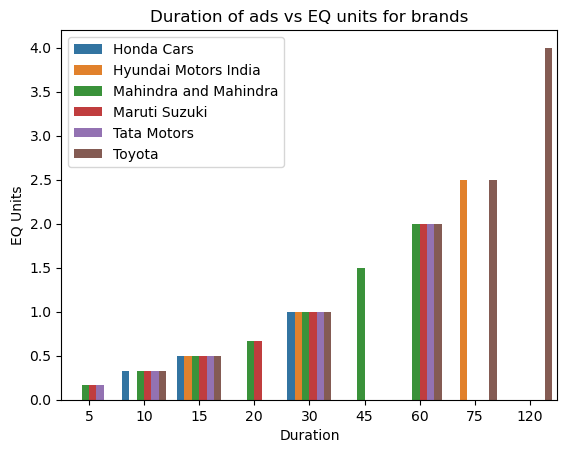

In [51]:
sns.barplot(x='Duration', y='EQ Units', hue='Brand', data=ca_4)
plt.title('Duration of ads vs EQ units for brands')
plt.legend(loc='upper left')

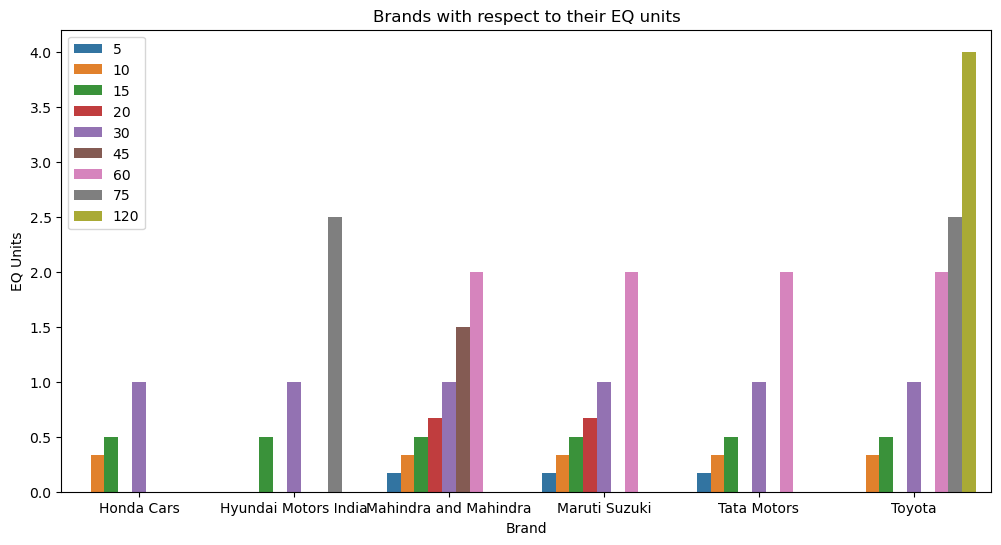

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(x='Brand', y='EQ Units', hue='Duration', data=ca_4)
plt.title('Brands with respect to their EQ units')
plt.legend(loc='upper left')

In [24]:
ca_5=df.groupby(['Brand','Pod Position','EQ Units'])['Spend ($)'].sum().reset_index()
ca_5

,Brand,Pod Position,EQ Units,Spend ($)
0,Honda Cars,1,0.33,6860
1,Honda Cars,1,0.50,1767014
2,Honda Cars,1,1.00,5680680
3,Honda Cars,2,0.33,12126
4,Honda Cars,2,0.50,2028733
...,...,...,...,...
547,Toyota,23,1.00,11402
548,Toyota,24,0.50,868
549,Toyota,25,0.50,2186
550,Toyota,26,1.00,1021


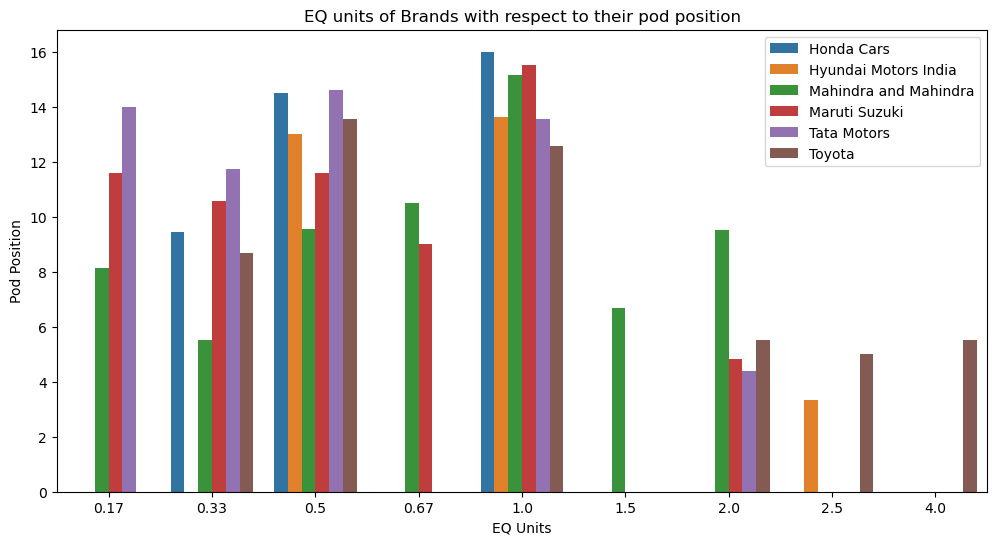

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(x='EQ Units', y='Pod Position', hue='Brand', data=ca_5, ci=None)
plt.title('EQ units of Brands with respect to their pod position')
plt.legend(loc='upper right')

In [26]:
ca_6=df.groupby(['Brand','Quarter','EQ Units'])['Spend ($)'].sum().reset_index()
ca_6

,Brand,Quarter,EQ Units,Spend ($)
0,Honda Cars,1,0.33,799
1,Honda Cars,1,0.50,4692409
2,Honda Cars,1,1.00,12270570
3,Honda Cars,2,0.33,66761
4,Honda Cars,2,0.50,3201174
...,...,...,...,...
92,Toyota,3,1.00,20813563
93,Toyota,3,4.00,21688
94,Toyota,4,0.33,19194
95,Toyota,4,0.50,4537507


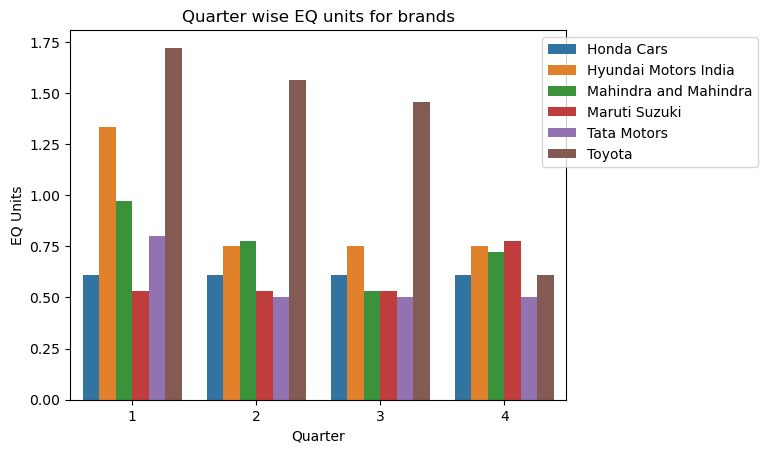

In [27]:
sns.barplot(x='Quarter', y='EQ Units', hue='Brand', data=ca_6, ci=None)
plt.title('Quarter wise EQ units for brands')
plt.legend(loc='upper right', bbox_to_anchor=(1.4,1.0))

In [28]:
ca_7=df.groupby(['Brand','Dayparts','EQ Units'])['Spend ($)'].sum().reset_index()
ca_7

,Brand,Dayparts,EQ Units,Spend ($)
0,Honda Cars,DAYTIME,0.33,24759
1,Honda Cars,DAYTIME,0.50,4612277
2,Honda Cars,DAYTIME,1.00,10469763
3,Honda Cars,EARLY FRINGE,0.33,7719
4,Honda Cars,EARLY FRINGE,0.50,1636564
...,...,...,...,...
220,Toyota,PRIME TIME,4.00,8424
221,Toyota,WEEKEND,0.50,6027840
222,Toyota,WEEKEND,1.00,20649090
223,Toyota,WEEKEND,2.50,1180


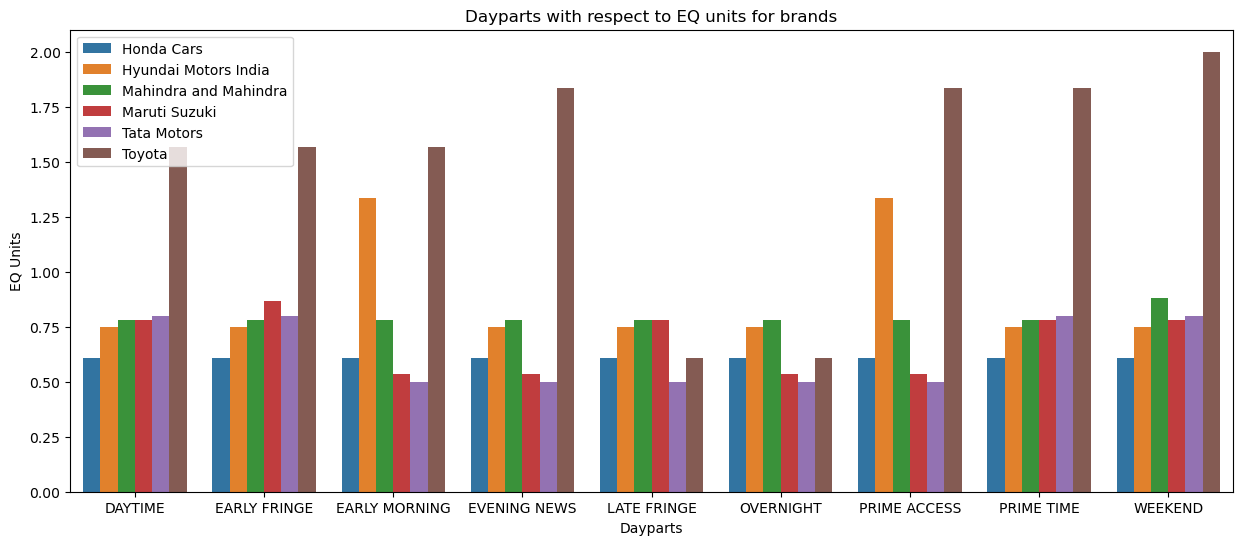

In [29]:
plt.figure(figsize=(15,6))
sns.barplot(x='Dayparts', y='EQ Units', hue='Brand', data=ca_7, ci=None)
plt.title('Dayparts with respect to EQ units for brands')
plt.legend(loc='best')

In [30]:
ca_8=df.groupby(['Brand','TimeZone','EQ Units'])['Spend ($)'].sum().reset_index()
ca_8

,Brand,TimeZone,EQ Units,Spend ($)
0,Honda Cars,Central India,0.50,35297
1,Honda Cars,Central India,1.00,21161
2,Honda Cars,Northeast India,0.33,69068
3,Honda Cars,Northeast India,0.50,13556155
4,Honda Cars,Northeast India,1.00,33104153
...,...,...,...,...
76,Toyota,Northern India,0.50,4
77,Toyota,Northern India,1.00,197463
78,Toyota,Southern India,0.33,14214
79,Toyota,Southern India,0.50,2614610


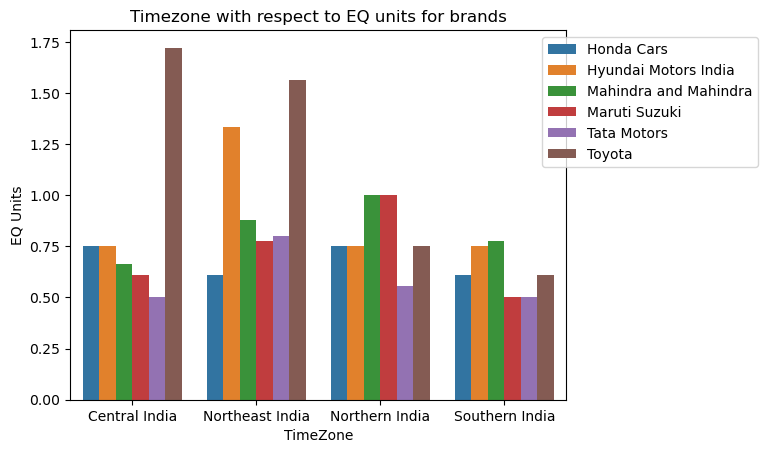

In [31]:
sns.barplot(x='TimeZone', y='EQ Units', hue='Brand', data=ca_8, ci=None)
plt.title('Timezone with respect to EQ units for brands')
plt.legend(loc='upper right', bbox_to_anchor=(1.4,1.0))

In [52]:
ca_9=df.groupby(['Brand','Network Type'])['Spend ($)'].sum().reset_index()
ca_9

,Brand,Network Type,Spend ($)
0,Honda Cars,broadcast,14835303
1,Honda Cars,cable,33423037
2,Hyundai Motors India,broadcast,86701728
3,Hyundai Motors India,cable,94107028
4,Mahindra and Mahindra,broadcast,181166689
5,Mahindra and Mahindra,cable,216138966
6,Maruti Suzuki,broadcast,239190273
7,Maruti Suzuki,cable,319456199
8,Tata Motors,broadcast,29303349
9,Tata Motors,cable,65486878


<AxesSubplot:xlabel='Brand', ylabel='Spend ($)'>

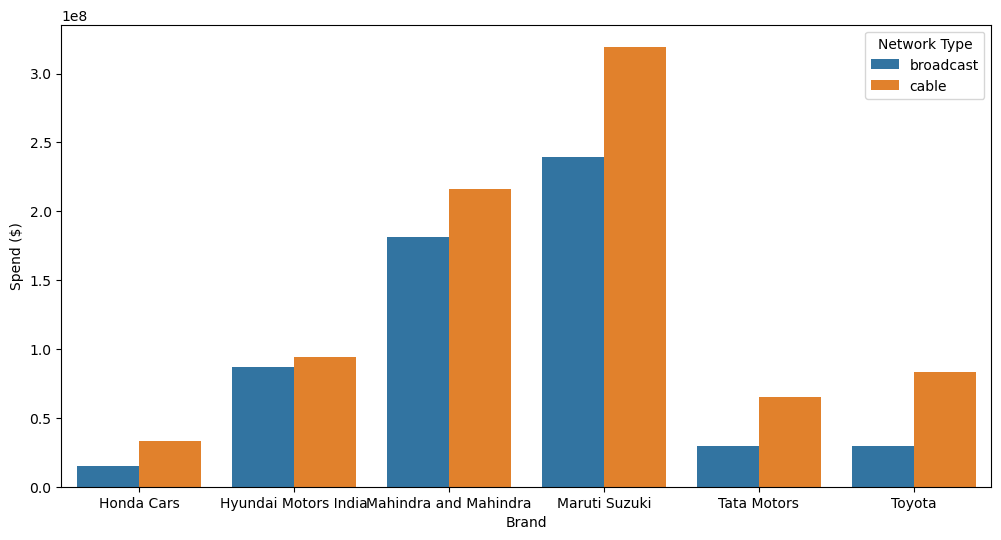

In [56]:
plt.figure(figsize=(12,6))
sns.barplot(x='Brand', y='Spend ($)', hue='Network Type', data=ca_9)

In [32]:
#Q.4 Mahindra and Mahindra wants to run a digital ad campaign to complement its existing TV ads in Q1 of 2022.
#Based on the data from 2021, suggest a media plan to the CMO of Mahindra and Mahindra. Which audience should they target? 
#*Assume XYZ Ads has the ad viewership data and TV viewership for the people in India.

In [33]:
mm_df=df[df['Brand']=='Mahindra and Mahindra']
mm_df

,Id,Brand,Product,Network,Network Type,Show,Date,Time,Pod Position,Dayparts,Duration,EQ Units,Spend ($),Broadcast Year,Broadcast Month,Broadcast Week,Day Of Week,Hour Of Day,TimeZone,Quarter
23,1000024,Mahindra and Mahindra,Mahindra XUV 700,N-10103,cable,S-22277,2021-01-01,4:28:54 PM,1,EARLY FRINGE,20,0.67,417,2021,JAN,1,5,16,Northeast India,1
24,1000025,Mahindra and Mahindra,Mahindra New Thar,N-10016,cable,S-16132,2021-01-13,12:15:52 PM,2,DAYTIME,30,1.00,116,2021,JAN,3,3,12,Northeast India,1
25,1000026,Mahindra and Mahindra,Mahindra XUV 700,N-10010,cable,S-22198,2021-01-02,6:52:36 AM,6,EARLY MORNING,20,0.67,151,2021,JAN,1,6,6,Northeast India,1
30,1000031,Mahindra and Mahindra,Mahindra New Thar,N-10058,cable,S-19523,2021-01-02,4:53:16 PM,4,WEEKEND,30,1.00,780,2021,JAN,1,6,16,Northeast India,1
39,1000040,Mahindra and Mahindra,Mahindra New Thar,N-10099,cable,S-17876,2021-01-16,11:21:57 AM,7,WEEKEND,30,1.00,1362,2021,JAN,3,6,11,Northeast India,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731744,1731745,Mahindra and Mahindra,Mahindra New Thar,N-10119,cable,S-22370,2021-12-22,2:32:24 PM,5,DAYTIME,30,1.00,142,2021,DEC,52,3,14,Northeast India,4
731759,1731760,Mahindra and Mahindra,Mahindra New Thar,N-10092,cable,S-18149,2021-12-30,3:13:47 PM,3,DAYTIME,30,1.00,2084,2022,JAN,1,4,15,Northeast India,4
731764,1731765,Mahindra and Mahindra,Mahindra New Thar,N-10058,cable,S-17840,2021-12-24,11:24:09 AM,2,DAYTIME,30,1.00,334,2021,DEC,52,5,11,Northeast India,4
731766,1731767,Mahindra and Mahindra,Mahindra New Thar,N-10038,cable,S-12191,2021-12-31,1:16:12 PM,4,DAYTIME,30,1.00,42693,2022,JAN,1,5,13,Southern India,4


In [34]:
mm_ad=mm_df.groupby(['Quarter'])['Spend ($)'].sum().reset_index()
mm_ad

,Quarter,Spend ($)
0,1,129215380
1,2,99500908
2,3,95196781
3,4,73392586


Text(0.5, 1.0, 'Ad spending per quarter')

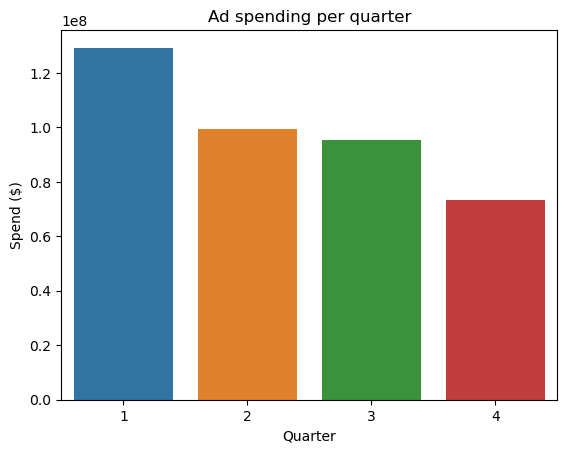

In [35]:
sns.barplot(x='Quarter', y='Spend ($)', data=mm_ad)
plt.title('Ad spending per quarter')

In [36]:
mm_dt=mm_df.groupby(['Product'])['Spend ($)'].sum().reset_index()
mm_dt

,Product,Spend ($)
0,Mahindra New Thar,393217909
1,Mahindra Scorpio,2278229
2,Mahindra XUV 700,1809517


Text(0.5, 1.0, 'Ad spending per product')

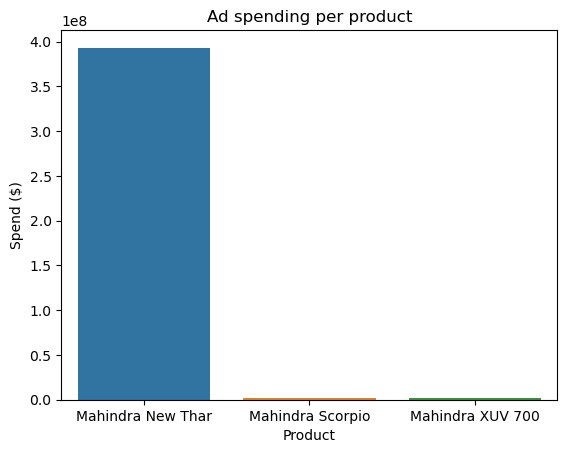

In [37]:
sns.barplot(x='Product', y='Spend ($)', data=mm_dt)
plt.title('Ad spending per product')

<AxesSubplot:xlabel='Broadcast Month', ylabel='Spend ($)'>

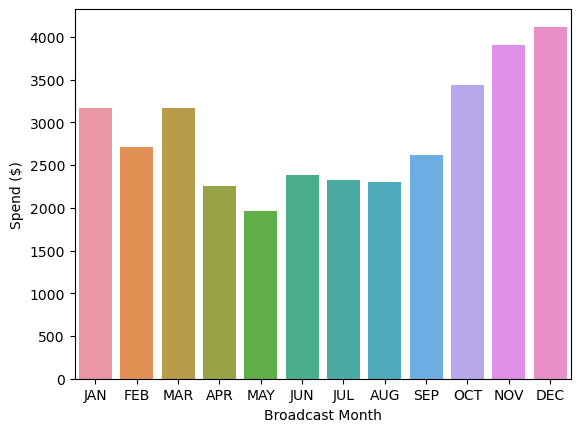

In [38]:
sns.barplot(x='Broadcast Month', y='Spend ($)', data=mm_df, ci=None)

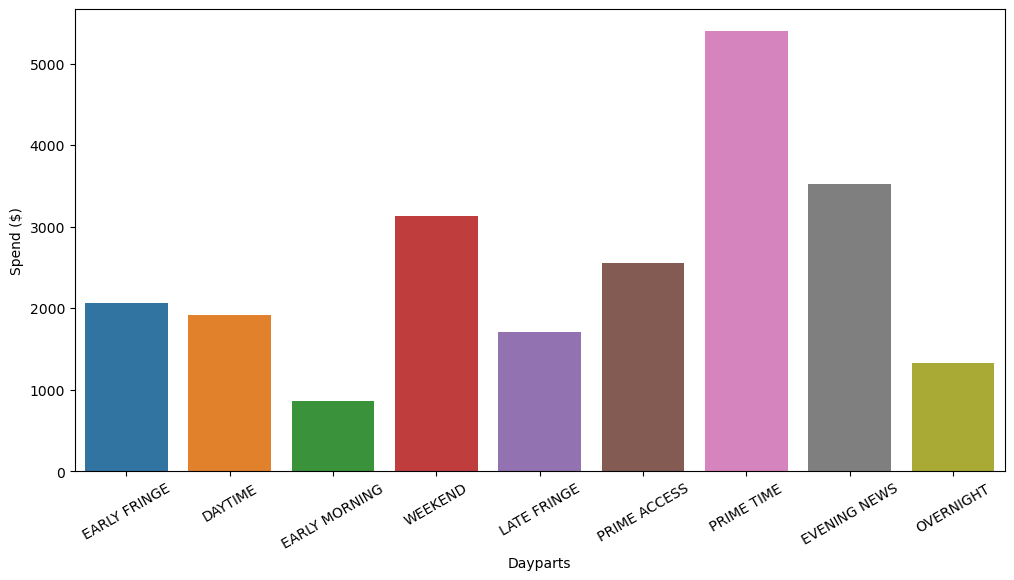

In [39]:
plt.figure(figsize=(12,6))
sns.barplot(x='Dayparts', y='Spend ($)', data=mm_df, ci=None)
plt.xticks(rotation=30)
plt.show()

<AxesSubplot:xlabel='TimeZone', ylabel='Spend ($)'>

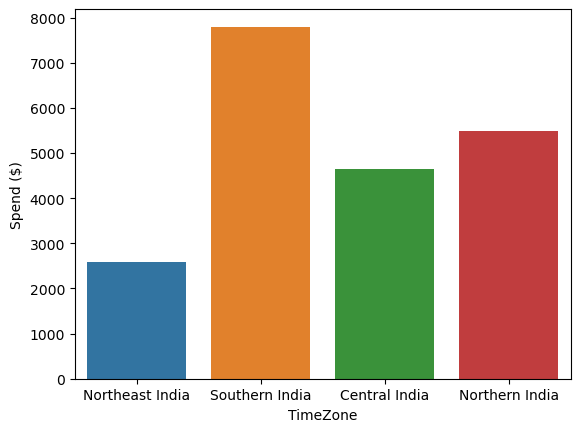

In [40]:
sns.barplot(x='TimeZone', y='Spend ($)', data=mm_df, ci=None)

<AxesSubplot:xlabel='TimeZone', ylabel='Spend ($)'>

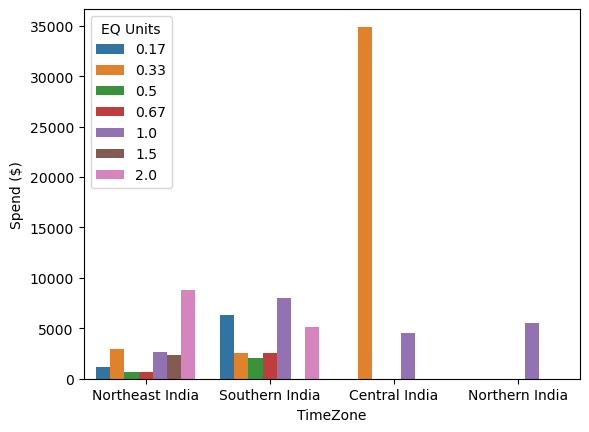

In [58]:
sns.barplot(x='TimeZone', y='Spend ($)', hue='EQ Units', data=mm_df, ci=None)

<AxesSubplot:xlabel='Pod Position', ylabel='Spend ($)'>

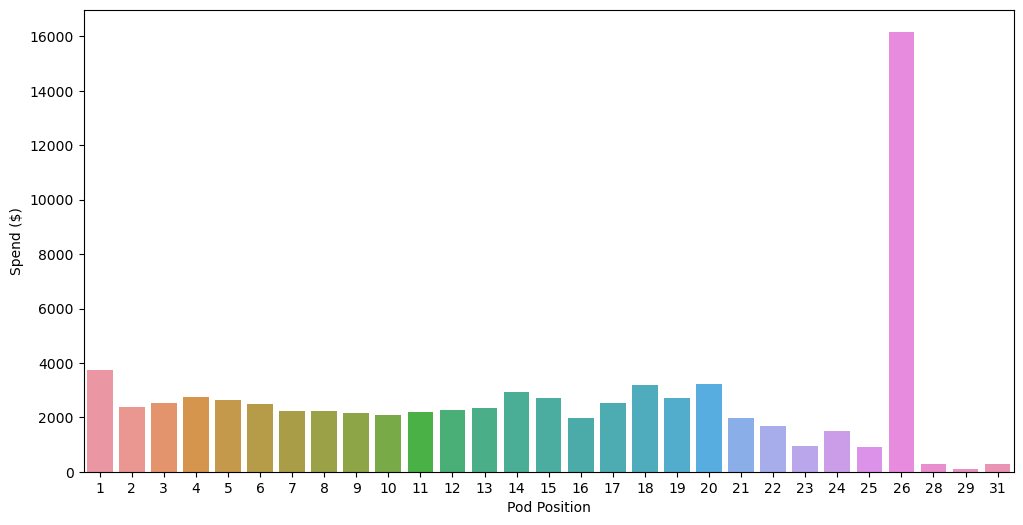

In [42]:
plt.figure(figsize=(12,6))
sns.barplot(x='Pod Position', y='Spend ($)', data=mm_df, ci=None)

<AxesSubplot:xlabel='Duration', ylabel='Spend ($)'>

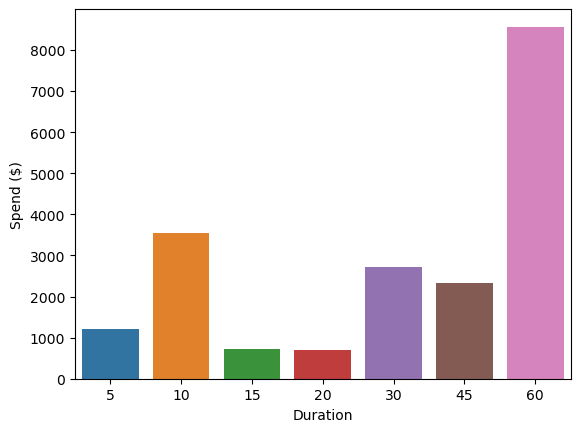

In [43]:
sns.barplot(x='Duration', y='Spend ($)', data=mm_df, ci=None)

In [44]:
ms_df=df[df['Brand']=='Maruti Suzuki']
ms_df

,Id,Brand,Product,Network,Network Type,Show,Date,Time,Pod Position,Dayparts,Duration,EQ Units,Spend ($),Broadcast Year,Broadcast Month,Broadcast Week,Day Of Week,Hour Of Day,TimeZone,Quarter
1,1000002,Maruti Suzuki,Maruti Suzuki Baleno,N-10096,cable,S-17450,2021-01-16,7:28:13 PM,3,WEEKEND,30,1.0,514,2021,JAN,3,6,19,Northeast India,1
2,1000003,Maruti Suzuki,Maruti Suzuki Ciaz,N-10044,cable,S-12299,2021-01-05,1:09:26 PM,2,DAYTIME,30,1.0,2313,2021,JAN,2,2,13,Northeast India,1
3,1000004,Maruti Suzuki,Maruti Suzuki Ciaz,N-10060,cable,S-14354,2021-01-06,8:55:49 AM,1,EARLY MORNING,30,1.0,308,2021,JAN,2,3,8,Northeast India,1
6,1000007,Maruti Suzuki,Maruti Suzuki Ciaz,N-10135,cable,S-15889,2021-01-06,7:12:36 PM,3,PRIME ACCESS,30,1.0,1545,2021,JAN,2,3,19,Northeast India,1
10,1000011,Maruti Suzuki,Maruti Suzuki Ciaz,N-10103,cable,S-19117,2021-01-07,3:24:03 AM,1,OVERNIGHT,30,1.0,55,2021,JAN,2,4,3,Northeast India,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731777,1731778,Maruti Suzuki,Maruti Suzuki Baleno,N-10058,cable,S-16893,2021-12-26,8:11:23 PM,1,PRIME TIME,30,1.0,752,2021,DEC,52,7,20,Northeast India,4
731778,1731779,Maruti Suzuki,Maruti Suzuki Baleno,N-10023,cable,S-10943,2021-12-29,9:43:50 PM,2,PRIME TIME,30,1.0,2336,2022,JAN,1,3,21,Northeast India,4
731781,1731782,Maruti Suzuki,Maruti Suzuki Baleno,N-10041,cable,S-19396,2021-12-29,11:25:10 AM,2,DAYTIME,30,1.0,594,2022,JAN,1,3,11,Northeast India,4
731782,1731783,Maruti Suzuki,Maruti Suzuki Baleno,N-10113,cable,S-19407,2021-12-31,11:54:13 AM,1,DAYTIME,30,1.0,40,2022,JAN,1,5,11,Northeast India,4


<AxesSubplot:xlabel='Pod Position', ylabel='Spend ($)'>

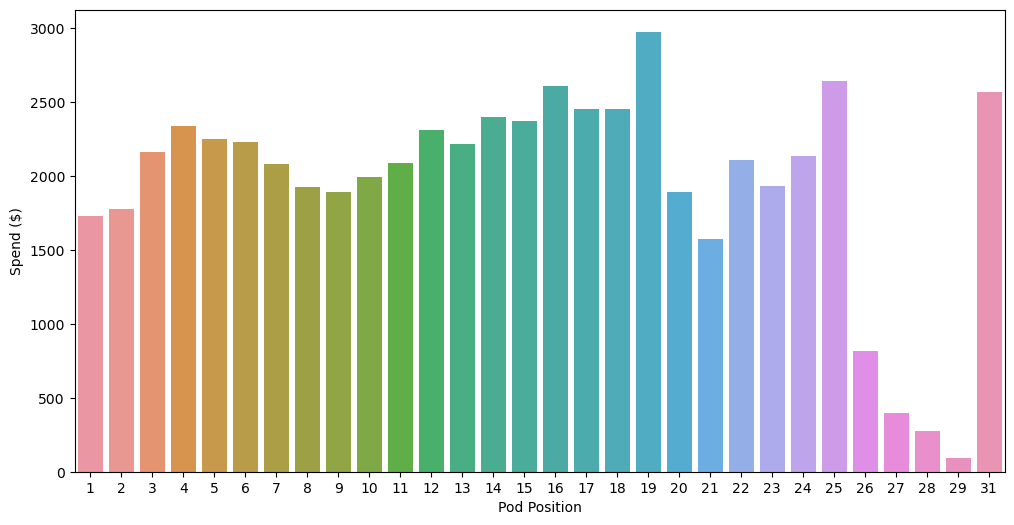

In [45]:
plt.figure(figsize=(12,6))
sns.barplot(x='Pod Position', y='Spend ($)', data=ms_df, ci=None)

<AxesSubplot:xlabel='Duration', ylabel='Spend ($)'>

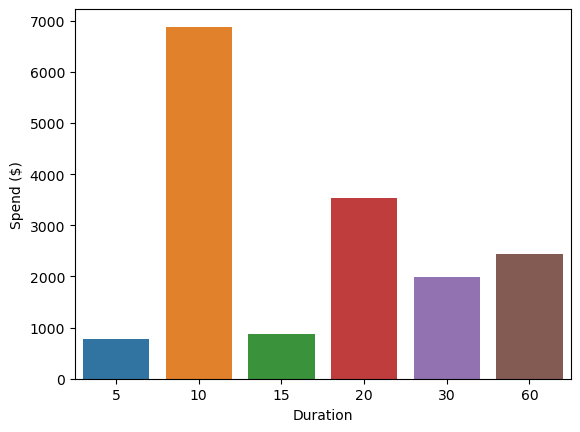

In [46]:
sns.barplot(x='Duration', y='Spend ($)', data=ms_df, ci=None)

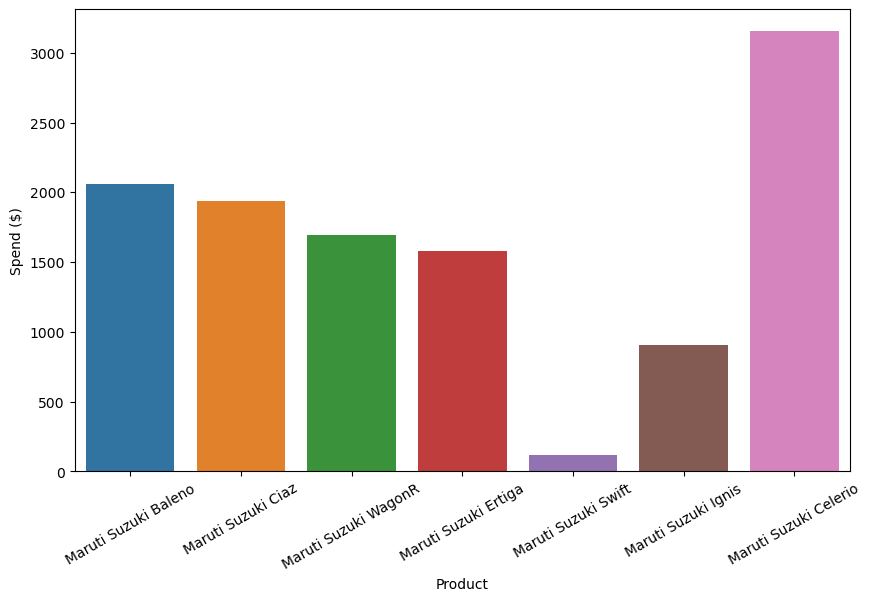

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(x='Product', y='Spend ($)', data=ms_df, ci=None)
plt.xticks(rotation=30)
plt.show()